# Projekt Indywidualny 2020/2021
Zadaniem tego projektu jest potwierdzenie przez Państwa posidania umiejętności budowania modelu regresji na przykładzie danych zawierających ceny nieruchomości znajdujących się w pliku "domy.csv". W zadaniu należy wykorzystać wiedzę poznaną na laboratorium i wykładzie w tym metody regularyzacji, metody wyboru i tworzenia nowych zmiennych, określenie jakości modelu.

Za projekt można zdobyć 35 pkt. Za każde zadanie można dostać od 0 do 5 pkt. Każde zadanie musi być opisane stosownymi komentarzami i podsumowane wnioskami wynikającymi z wykonanych obliczeń.

**!!! Do wykonania projektu nie możemy korzystać z rzadnych dodatkowych pakietów niż poniższe 5 !!!**

Czas na wykonanie projektu - 31.12.2020 r.

In [1]:
# Wyczanie pakietów podstawowych
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Wczytanie danych
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


### Podział danych zostanie dokonany zależnie od numeru indeksu

In [3]:
# !!!Jako random_state podaj swój numer indeksu!!!
numer_indeksu = 284363
ceny = domy['price']
domy.drop('price', axis=1, inplace=True)
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
cechy = domy.columns.values
cechy 

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

## Zadanie 1
Dokonaj analizy posiadanych zmiennych. Zakresy zmienności, korelacje, skośność. Dane nieużyteczne jak np. id można odrzucić.

In [4]:
# zmienna przechowuje nazwy chech, które są nieużytyczne
useless_features = set()

# funkcje pomocnicze
def show_stat_data(data):
    df = get_df(data)
    
    display(df.describe())
    
    plot_dist(df)
    
    display(df.corr())

    plot_scatter(df)
    
    return df
    
def plot_dist(df, feature=None):
    plt.figure(figsize=(8,5), dpi= 80)
    if feature is not None:
        sns.distplot(df.loc[:, (feature)])
    else:
        sns.distplot(df.data)
    plt.plot()
    
def plot_dist_data(data, data_name):
    df = pd.DataFrame(data={data_name: data})
    plot_dist(df, data_name)
    
def plot_scatter(df):
    plt.figure(figsize=(8,5), dpi= 80)
    plt.scatter(x=df.data, y=df.price)
    plt.xlabel("Data")
    plt.ylabel("Price")
    plt.plot()
    
def get_df(data):
    return pd.DataFrame(data={'data': data, 'price':ceny})

### 'id'

dane te nie wnoszą żadnej infromacji

In [5]:
#odrzucamy zmienną
useless_features.add('id')

### 'date'

20150527
20140502


,data,price
count,21613.000000,2.161300e+04
mean,180.193078,5.400881e+05
std,113.048011,3.671272e+05
min,0.000000,7.500000e+04
25%,81.000000,3.219500e+05
50%,167.000000,4.500000e+05
75%,291.000000,6.450000e+05
max,390.000000,7.700000e+06


c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,data,price
data,1.000000,-0.004357
price,-0.004357,1.000000


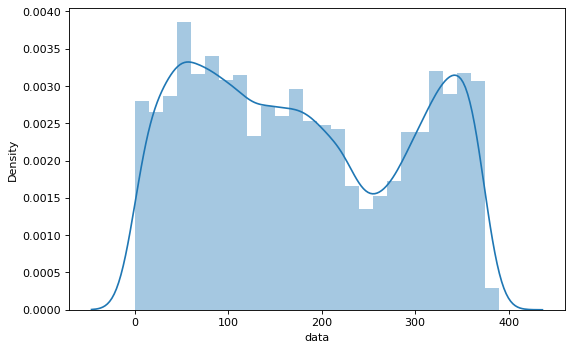

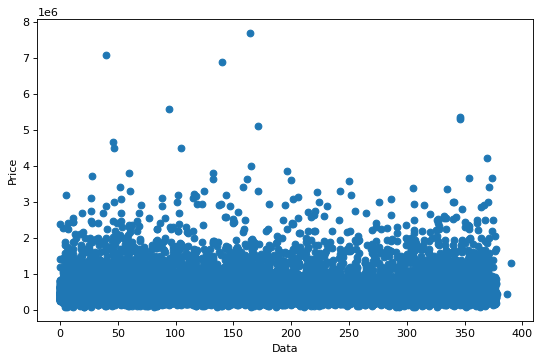

In [6]:
# importowanie tylko na potrzeby tej jedenj komórki, można ją usunąć
from datetime import datetime, date, timedelta
import calendar

domy_date = domy['date'].aggregate(lambda x: x.split('T')[0])

print(max(domy_date))
print(min(domy_date))

domy_date_datetime = domy['date'].aggregate(lambda x: datetime.strptime(x, "%Y%m%dT000000"))
first_day = min(domy_date_datetime)
domy_date_datetime_form_0 = (domy_date_datetime - first_day).aggregate(lambda x: x.days)

df = show_stat_data(domy_date_datetime_form_0)


Dane sprzedarzy pochodzą z okresu od 2014 maja do 2015 maja. Nie zachodzi żadna korelacja między dniem zakupu a ceną sprzedaży

In [7]:
#odrzucamy zmienną
useless_features.add('date')

### 'bedrooms' & 'bathrooms'

,bedrooms,bathrooms,price
count,14480.000000,14480.000000,1.448000e+04
mean,3.372307,2.122048,5.410971e+05
std,0.903902,0.768228,3.628559e+05
min,0.000000,0.000000,7.500000e+04
25%,3.000000,1.750000,3.210000e+05
50%,3.000000,2.250000,4.500000e+05
75%,4.000000,2.500000,6.450000e+05
max,11.000000,7.500000,5.570000e+06


c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


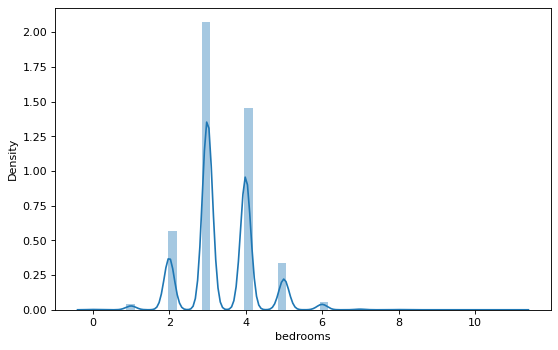

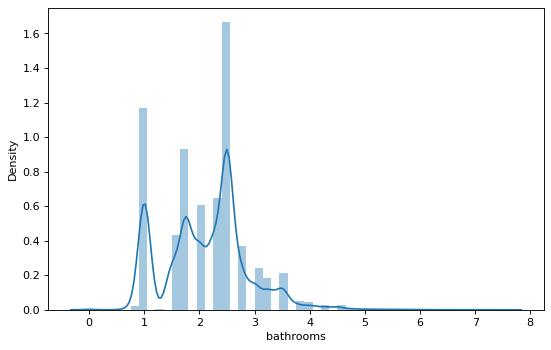

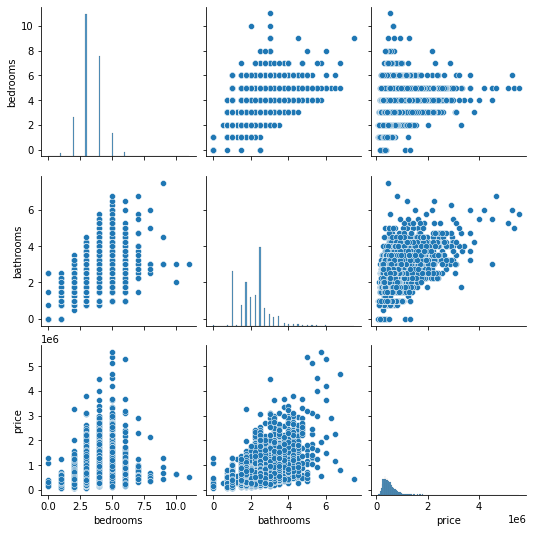

,bedrooms,bathrooms,price
bedrooms,1.000000,0.530974,0.323587
bathrooms,0.530974,1.000000,0.530623
price,0.323587,0.530623,1.000000


In [8]:
df = pd.DataFrame(data={
    'bedrooms': domy_train.loc[:, ('bedrooms')],
    'bathrooms': domy_train.loc[:, ('bathrooms')],
    'price': ceny_train
})

display(df.describe())

plot_dist(df, 'bedrooms')
plot_dist(df, 'bathrooms')
plt.show()

# wyświetlenie dwuwymiarowej zależności między zmiennymi
sns.pairplot(df, kind="scatter")
plt.show()

# wyświetlenie korelacji, metoda ta domyślnie wyznacza korelacje Pearsona
display(df.corr())

**'beadrooms'**  
Dane posiadają jeden punkt odstający, dom z 33 sypialniami.
Licza sypialni ma wpływ na cenę nieruchomości, tym nie mniej zachodzi słaba korelacja z cenną - 0.32.

**'bathrooms'**  
Można zauważyć, że dla mniejszych ilości łazienek cena nieruchomości jest niska, w przypadku większe ilości łazienek, nie zachodzi już taka zależność - ceny sprzedaży są zarówno wysokie jak i niskie.
Licza łazienek ma wpływ na cenę nieruchomości, zachodzi mocniejsza korelacja niż w przypadku sypialni, wynosi ona 0.53

### 'sqft_living' & 'sqft_lot' & sqft_above' & 'sqft_basement'

c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

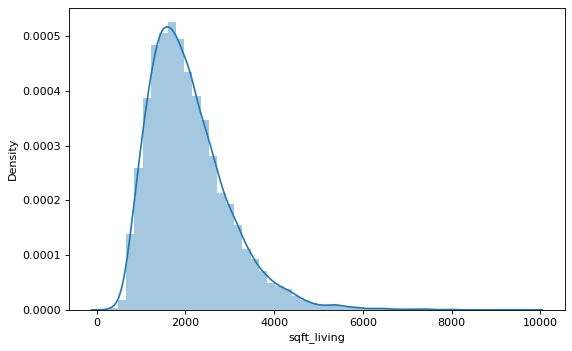

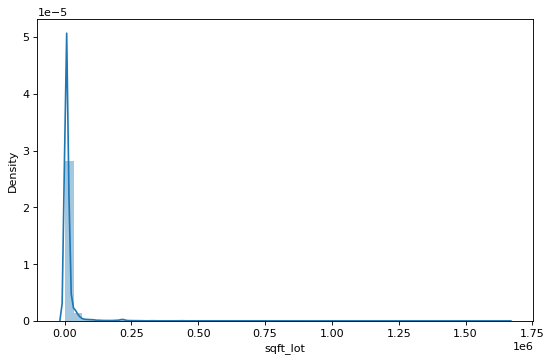

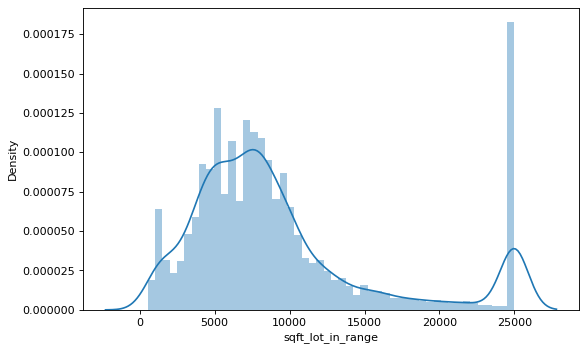

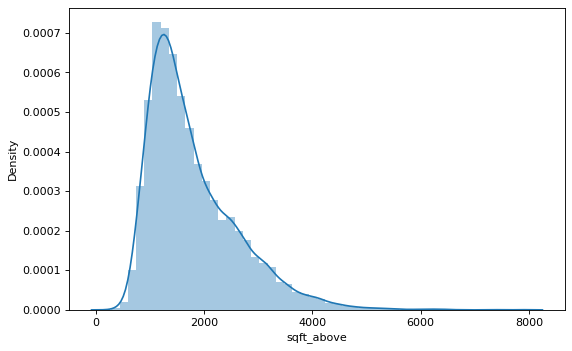

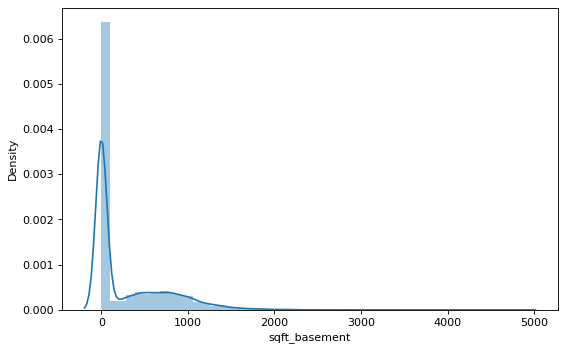

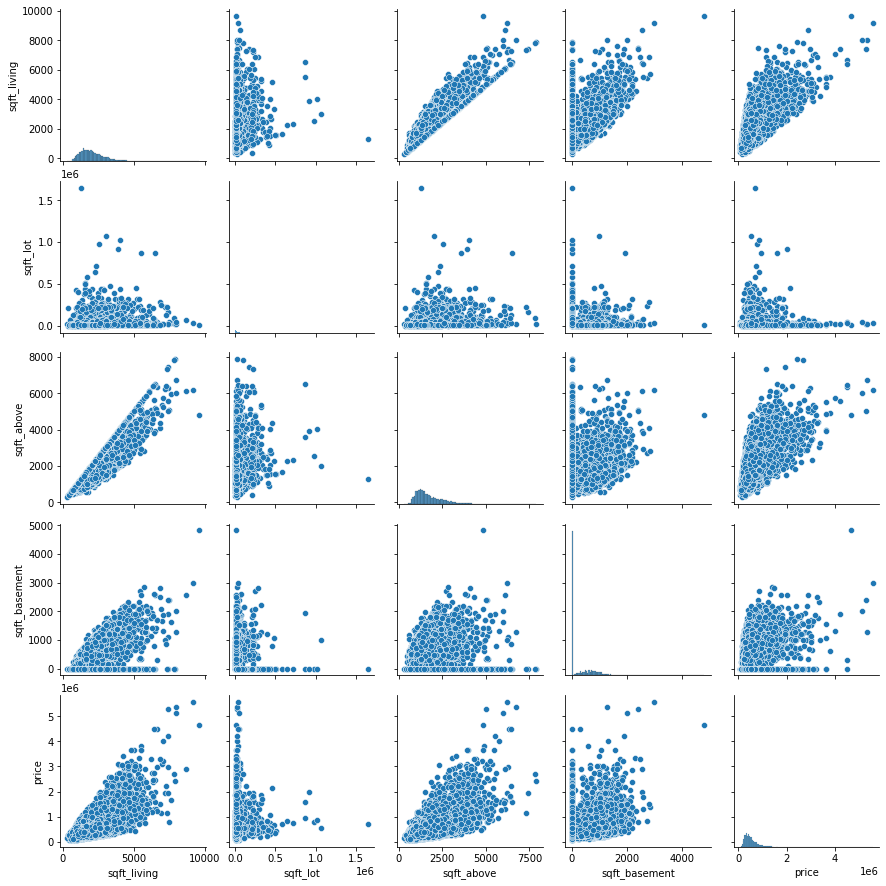

,sqft_living,sqft_lot,sqft_above,sqft_basement,price
count,14480.000000,1.448000e+04,14480.000000,14480.000000,1.448000e+04
mean,2084.282320,1.491315e+04,1795.087293,289.195028,5.410971e+05
std,913.669809,4.054462e+04,828.292066,438.971915,3.628559e+05
min,290.000000,5.200000e+02,290.000000,0.000000,7.500000e+04
25%,1430.000000,5.029000e+03,1200.000000,0.000000,3.210000e+05
50%,1920.000000,7.650000e+03,1570.000000,0.000000,4.500000e+05
75%,2550.000000,1.071025e+04,2220.000000,560.000000,6.450000e+05
max,9640.000000,1.651359e+06,7880.000000,4820.000000,5.570000e+06


,sqft_living,sqft_lot,sqft_above,sqft_basement,price
sqft_living,1.000000,0.173305,0.877504,0.425632,0.708303
sqft_lot,0.173305,1.000000,0.184762,0.012089,0.095086
sqft_above,0.877504,0.184762,1.000000,-0.060467,0.611394
sqft_basement,0.425632,0.012089,-0.060467,1.000000,0.320617
price,0.708303,0.095086,0.611394,0.320617,1.000000


In [9]:
df = pd.DataFrame(data={
    'sqft_living': domy_train.loc[:, ('sqft_living')],
    'sqft_lot': domy_train.loc[:, ('sqft_lot')],
    'sqft_above': domy_train.loc[:, ('sqft_above')],
    'sqft_basement': domy_train.loc[:, ('sqft_basement')],
    'price': ceny_train
})

# wyświetlenie histogramu nowej zmiennej
plot_dist(df, 'sqft_living')
plot_dist(df, 'sqft_lot')
plot_dist_data(domy_train.loc[:, ('sqft_lot')].where(domy_train.loc[:, ('sqft_lot')]<25000, 25000),'sqft_lot_in_range')
plot_dist(df, 'sqft_above')
plot_dist(df, 'sqft_basement')
plt.show()

# wyświetlenie dwuwymiarowej zależności między zmiennymi
sns.pairplot(df, kind="scatter")
plt.show()

display(df.describe())

# wyświetlenie korelacji, metoda ta domyślnie wyznacza korelacje Pearsona
display(df.corr())

Wszystkie dany zaczynające się na 'sqft' określają powierzchnię w stopach kwadratowych.

**'sqft_living'**  
Dane te określają powierzchnię użytkową wewnątrz domu. Średni dom posiada powierzchnię 2084 ft2. Dane te są prawoskośne. Zachodzi korelacja 0.71 z ceną sprzedaży domu.

**'sqft_lot'**  
Dane te określają powierzchnię przestrzeni dokoła domu. Jest bardzo duży zakres tej zmiennej od 520 ft2 do 1.6 miliona ft2.  Dane te są mocono prawoskośne. Korelacja z ceną sprzedaży domu jest marginalna - 0.10. 

**'sqft_above'**  
Dane te określają powierzchnię domu powyżej poziomu gruntu. Rozkłąd tych danych jest prawoskośny. Zachodzi korelacja równa 0.61 z ceną sprzedaży domu

**'sqft_basement'**  
Dane te określają powierzchnię w stopach kwadratowych piwnic (przestrzeń poniżej poziomu gruntu). Co istotne zdecydowana wiekszość domów nie posiada piwnic, wówczas pwierzchnia równa jest 0. Zachodzi słaba korelacja z ceną sprzedaży 0.32.

### 'sqft_living' & 'sqft_living15' & 'sqft_lot' & 'sqft_lot15'

,sqft_living,sqft_living15,sqft_lot,sqft_lot15,price
count,14480.000000,14480.000000,1.448000e+04,14480.000000,1.448000e+04
mean,2084.282320,1988.157251,1.491315e+04,12560.922169,5.410971e+05
std,913.669809,684.490951,4.054462e+04,26502.217390,3.628559e+05
min,290.000000,399.000000,5.200000e+02,651.000000,7.500000e+04
25%,1430.000000,1490.000000,5.029000e+03,5100.000000,3.210000e+05
50%,1920.000000,1840.000000,7.650000e+03,7650.000000,4.500000e+05
75%,2550.000000,2370.000000,1.071025e+04,10080.000000,6.450000e+05
max,9640.000000,6210.000000,1.651359e+06,871200.000000,5.570000e+06


c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

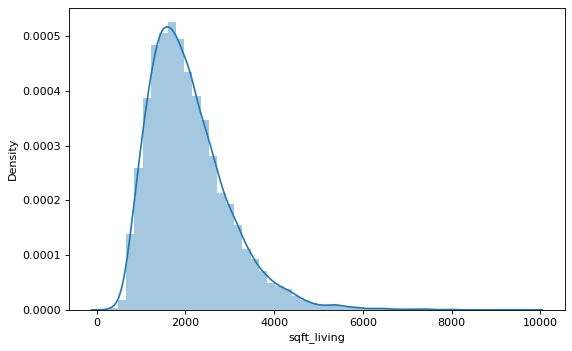

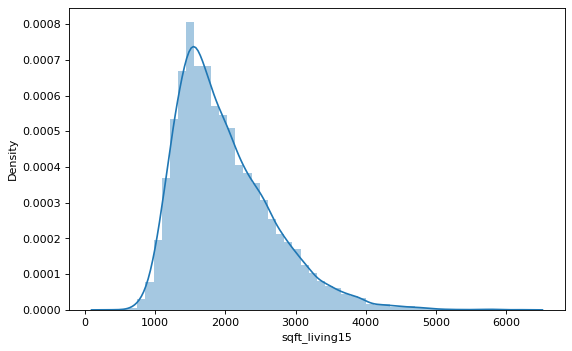

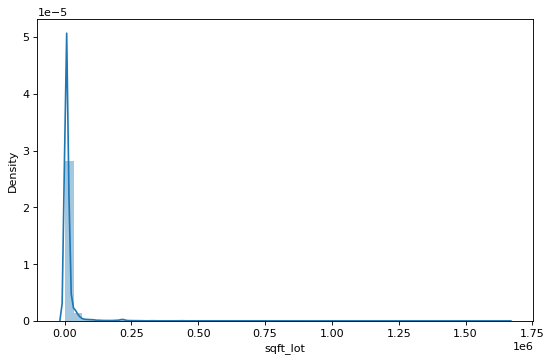

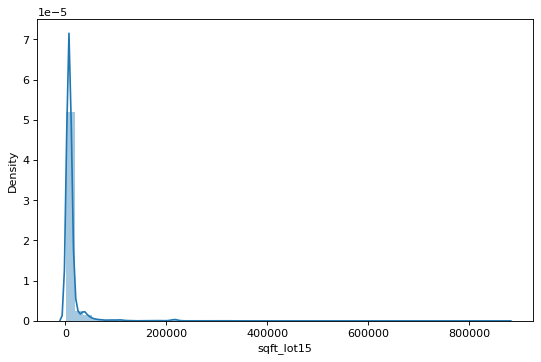

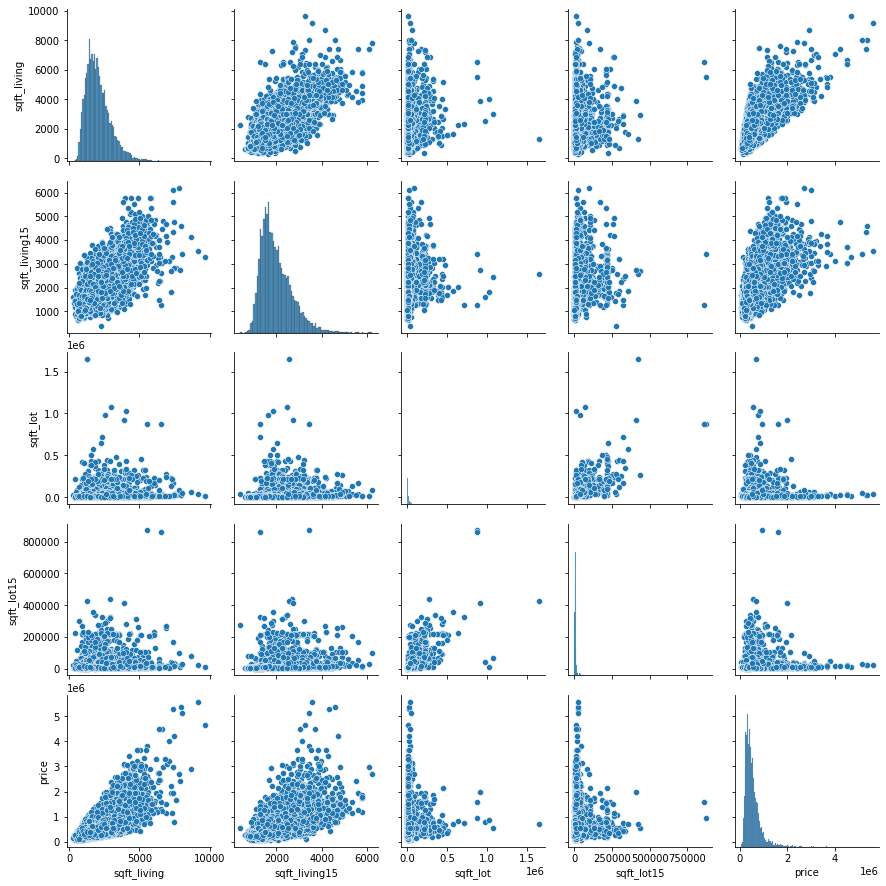

,sqft_living,sqft_living15,sqft_lot,sqft_lot15,price
sqft_living,1.000000,0.756140,0.173305,0.182398,0.708303
sqft_living15,0.756140,1.000000,0.148629,0.191369,0.585359
sqft_lot,0.173305,0.148629,1.000000,0.758475,0.095086
sqft_lot15,0.182398,0.191369,0.758475,1.000000,0.090180
price,0.708303,0.585359,0.095086,0.090180,1.000000


In [10]:
df = pd.DataFrame(data={
    'sqft_living': domy_train.loc[:, ('sqft_living')],
    'sqft_living15': domy_train.loc[:, ('sqft_living15')],
    'sqft_lot': domy_train.loc[:, ('sqft_lot')],
    'sqft_lot15': domy_train.loc[:, ('sqft_lot15')],
    'price': ceny_train
})

display(df.describe())

# wyświetlenie histogramu nowej zmiennej
plot_dist(df, 'sqft_living')
plot_dist(df, 'sqft_living15')
plot_dist(df, 'sqft_lot')
plot_dist(df, 'sqft_lot15')
plt.show()

# wyświetlenie dwuwymiarowej zależności między zmiennymi
sns.pairplot(df, kind="scatter")
plt.show()

# wyświetlenie korelacji, metoda ta domyślnie wyznacza korelacje Pearsona
display(df.corr())

Zmienne 'sqft_living15' oraz 'sqft_lot15' określają wartość uzyskaną za pomocą metody najbliższych sąsiadów, z wykorzystaniem 15 sąsiadówna podstawieodpowiednio 'sqft_living' oraz 'sqft_lot'

We wszystkich przypadkach mamy doczyeninia z rozkładem prawostronnie skośnym.

Korelacja względem ceny sprzedaży domu w przypadku:
* 'sqft_living15' uzyskano gorszy rezultat niż w dla 'sqft_living' - z 0.70 spadła na 0.58
* 'sqft_lot15' praktycznie pozostała na tym samym poziomie (brak korelacji) jak dla 'sqft_lot' - z 0.095 spadła na 0.09

In [11]:
#odrzucamy zmienną
useless_features.add('sqft_living15')
useless_features.add('sqft_lot15')

### 'floors' & 'waterfront' & 'view' & 'condition' & 'grade'

In [12]:
# ceacha 'floors' mimo iż posiada wartości liczbowe, reprezntowana jest za pomocą typu string,
# z tego powodu zmieniam jej typ na float
domy_train.loc[:, ('floors')] = domy_train.loc[:, ('floors')].apply(lambda x: float(x))
domy_test.loc[:, ('floors')] = domy_test.loc[:, ('floors')].apply(lambda x: float(x))

c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

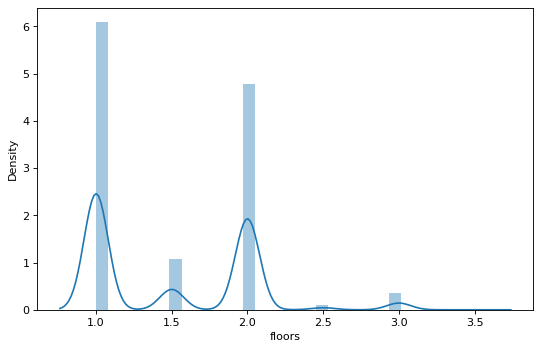

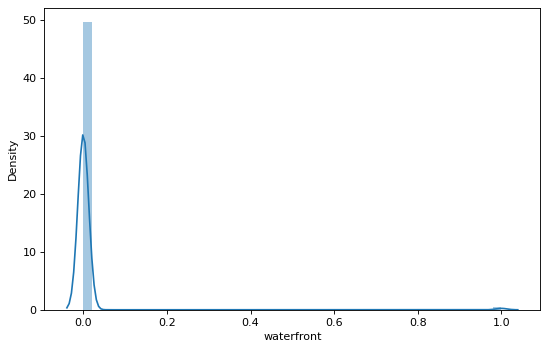

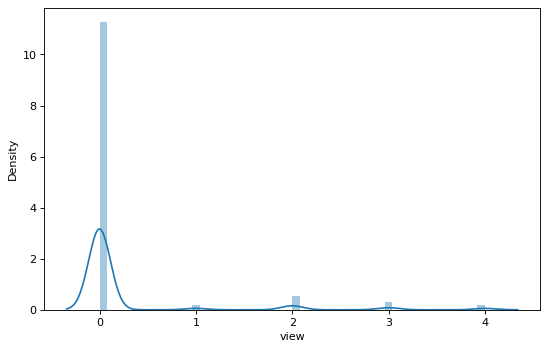

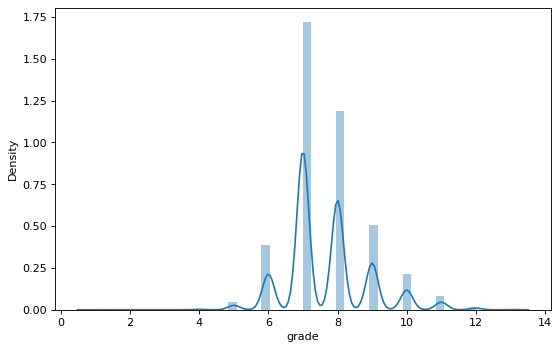

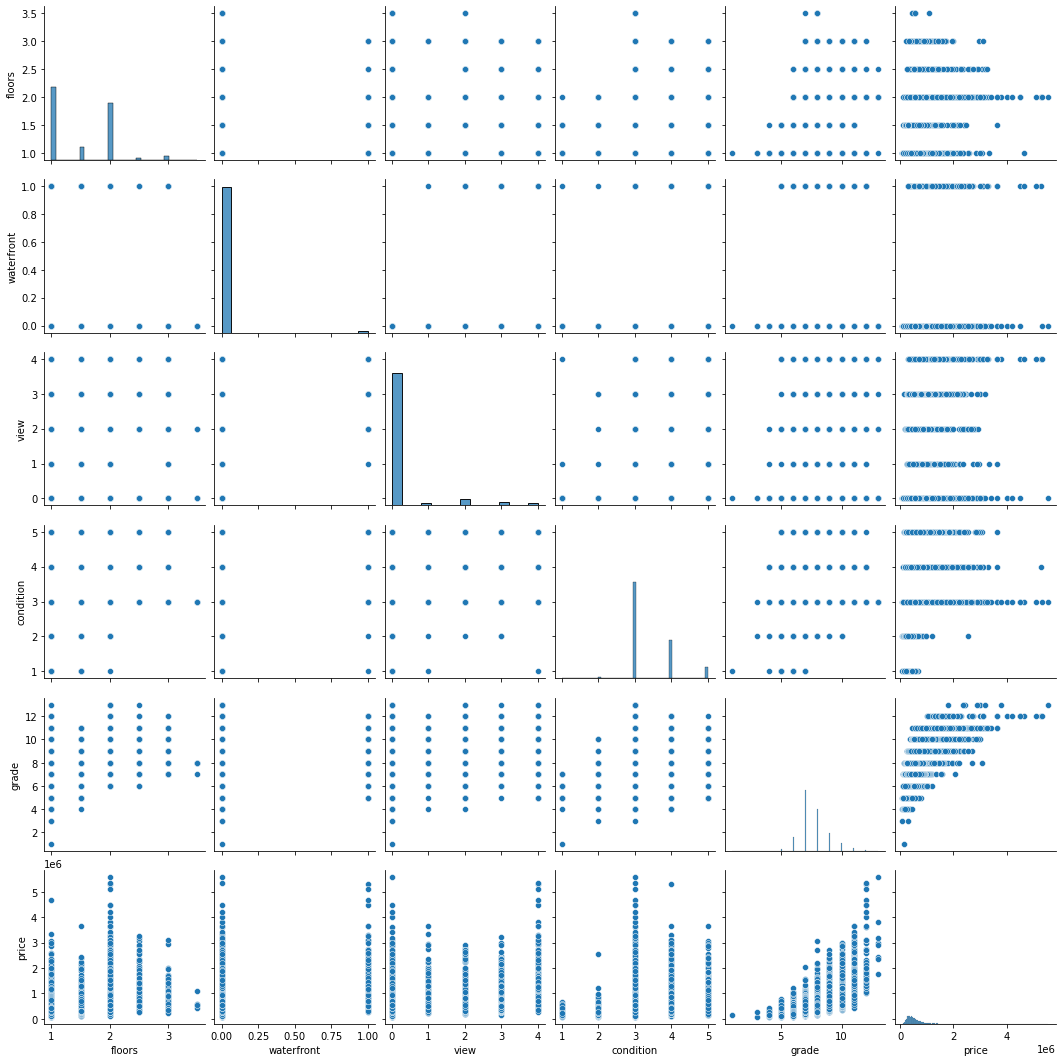

,floors,waterfront,view,condition,grade,price
count,14480.000000,14480.000000,14480.000000,14480.000000,14480.000000,1.448000e+04
mean,1.498964,0.007942,0.235566,3.409323,7.664365,5.410971e+05
std,0.541495,0.088766,0.769501,0.651145,1.177429,3.628559e+05
min,1.000000,0.000000,0.000000,1.000000,1.000000,7.500000e+04
25%,1.000000,0.000000,0.000000,3.000000,7.000000,3.210000e+05
50%,1.500000,0.000000,0.000000,3.000000,7.000000,4.500000e+05
75%,2.000000,0.000000,0.000000,4.000000,8.000000,6.450000e+05
max,3.500000,1.000000,4.000000,5.000000,13.000000,5.570000e+06


,floors,waterfront,view,condition,grade,price
floors,1.000000,0.023161,0.036388,-0.263235,0.457511,0.267527
waterfront,0.023161,1.000000,0.408402,0.023812,0.073745,0.243923
view,0.036388,0.408402,1.000000,0.041186,0.248875,0.388983
condition,-0.263235,0.023812,0.041186,1.000000,-0.147080,0.034786
grade,0.457511,0.073745,0.248875,-0.147080,1.000000,0.675449
price,0.267527,0.243923,0.388983,0.034786,0.675449,1.000000


In [13]:
df = pd.DataFrame(data={
    'floors': domy_train.loc[:, ('floors')],
    'waterfront': domy_train.loc[:, ('waterfront')],
    'view': domy_train.loc[:, ('view')],
    'condition': domy_train.loc[:, ('condition')],
    'grade': domy_train.loc[:, ('grade')],
    'price': ceny_train
})

# wyświetlenie histogramu nowej zmiennej
plot_dist(df, 'floors')
plot_dist(df, 'waterfront')
plot_dist(df, 'view')
plot_dist(df, 'grade')
plt.show()

# wyświetlenie dwuwymiarowej zależności między zmiennymi
sns.pairplot(df, kind="scatter")
plt.show()

# wyświetlenie danych statystycznych, poszczególnych zmiennych
display(df.describe())

# wyświetlenie korelacji, metoda ta domyślnie wyznacza korelacje Pearsona
display(df.corr())

**'floors'**  
Dane te określają liczbę pięter każdego z domu, wliczając w to półpiętra. Dane te są w zakresie od 1 do 3.5.
Jest bardzo słaba korelacja z ceną sprzedaży równa 0.27

**'waterfront'**
Cecha określa ona czy dom znajdue się nad frontem wodnym. Zaledie 8 promili sprzedanych domów posiada takowy front wodny, Wartość ta jest reprezentowana binranie. Z tych powodów wartość korelacja nie jest za wielka, wynosi ona 0.24, nie mniej jednak cecha wydaje się istotna podczas predykcji.

**'views'**
Dane te to liczby całkowite określające widok w skali od 0 do 4. 
Zdecydowana większość domów posiada widok o wartości 0, średnia wartość to zaledwie 0.41. Poziom korelacji jest na poziomie 0.40.

**'confitions'**
Dane te to liczby całkowite określające stan mieszkania w skali od 1 do 5. Jeśli można mówić o skośności w przypadku tego typu danych to są one prawoskośne. Poziom korelacji jest równy 0.03 - z zdego powodu można stwierdzić, że dane te są mało isotne podczas predykcji ceny.

**'grade'**
Dane te to liczby całkowite określające poziom konstrukcji oraz wyglądu w skali od 1 do 13. Dane są prawoskośńe 
Zachodzi korelacja z cenami sprzedaży nieruchomości, wynosi ona 0.664

In [14]:
#odrzucamy zmienną
useless_features.add('confitions')

### 'yr_built' & 'yr_renovated'

c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


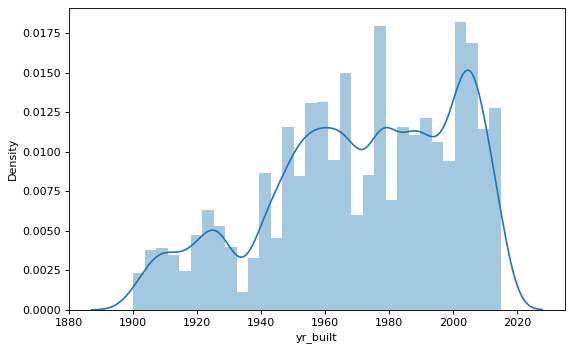

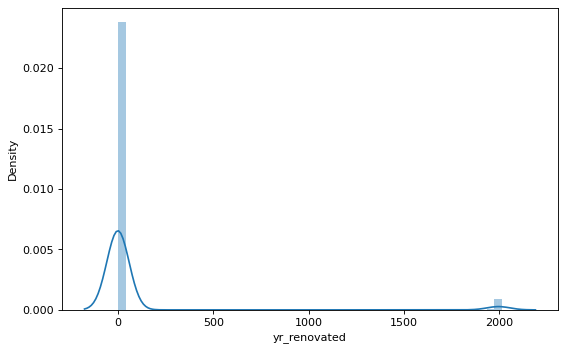

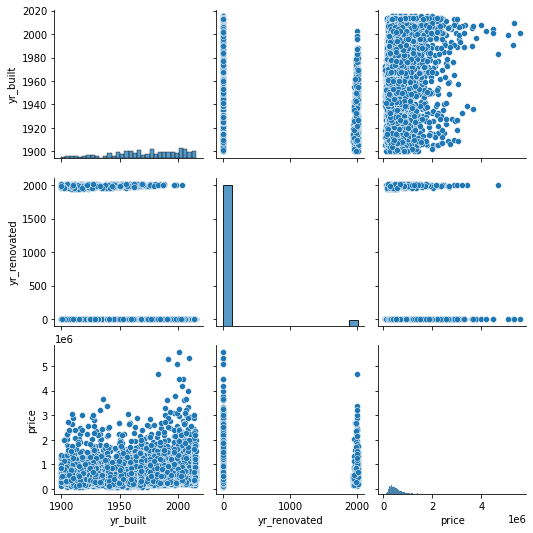

,yr_built,yr_renovated,price
count,14480.000000,14480.000000,1.448000e+04
mean,1971.290539,82.273826,5.410971e+05
std,29.402418,396.776019,3.628559e+05
min,1900.000000,0.000000,7.500000e+04
25%,1952.000000,0.000000,3.210000e+05
50%,1975.000000,0.000000,4.500000e+05
75%,1997.000000,0.000000,6.450000e+05
max,2015.000000,2015.000000,5.570000e+06


,yr_built,yr_renovated,price
yr_built,1.000000,-0.229562,0.060083
yr_renovated,-0.229562,1.000000,0.120543
price,0.060083,0.120543,1.000000


In [15]:
df = pd.DataFrame(data={
    'yr_built': domy_train.loc[:, ('yr_built')],
    'yr_renovated': domy_train.loc[:, ('yr_renovated')],
    'price': ceny_train
})

# wyświetlenie histogramu nowej zmiennej
plot_dist(df, 'yr_built')
plot_dist(df, 'yr_renovated')
plt.show()

# wyświetlenie dwuwymiarowej zależności między zmiennymi
sns.pairplot(df, kind="scatter")
plt.show()

# wyświetlenie danych statystycznych, poszczególnych zmiennych
display(df.describe())

# wyświetlenie korelacji, metoda ta domyślnie wyznacza korelacje Pearsona
display(df.corr())

**'yr_built'**  
Dane podają rok wybudowania sprzedaych domów. Najstarszy budynek jest z 1900 roku, Najmłodszy z 2015 roku. Dane te nie przypominają rozkładu normalnego. Nie zachodzi żadna korelacja między rokiem wybuodwania a ceną (0.05)

**'yr_renovated'**   
Dane te określają o rok w którym dom został ostatni raz wyremontowany. W przypdaku gdy dom nigdy nie był renomowany, wartoś roku wynosi 0. Domów, które przeszyły remont jest niewiele - poniżej 5%. Korelacja tych danych z ceną sprzedanych domów wynosi 0.13.

### 'zipcode' & 'lat' & 'long'

In [16]:
# ceacha 'zipcode' mimo iż posiada wartości liczbowe, reprezntowana jest za pomocą typu string,
# z tego powodu zmieniam jej typ na float
domy_train.loc[:, ('zipcode')] = domy_train.loc[:, ('zipcode')].apply(lambda x: float(x))
domy_test.loc[:, ('zipcode')] = domy_test.loc[:, ('zipcode')].apply(lambda x: float(x))

c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `di

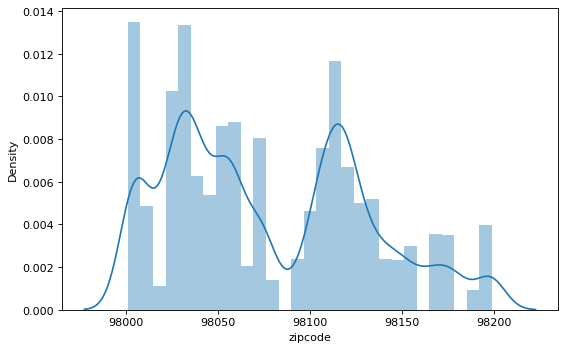

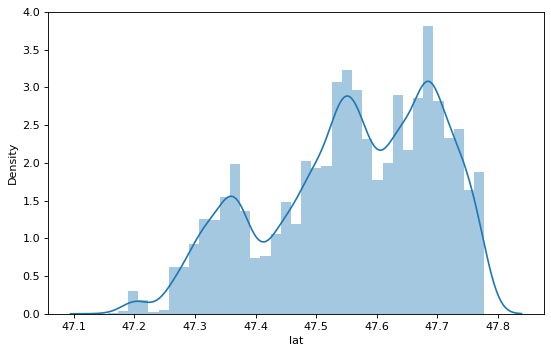

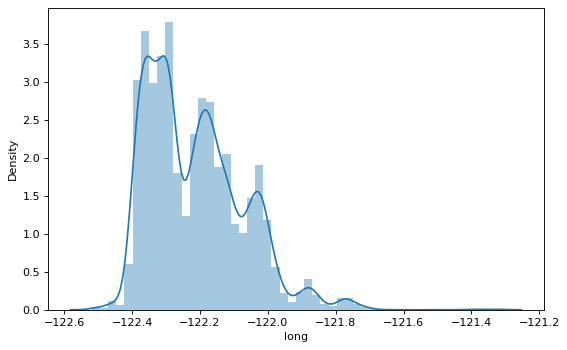

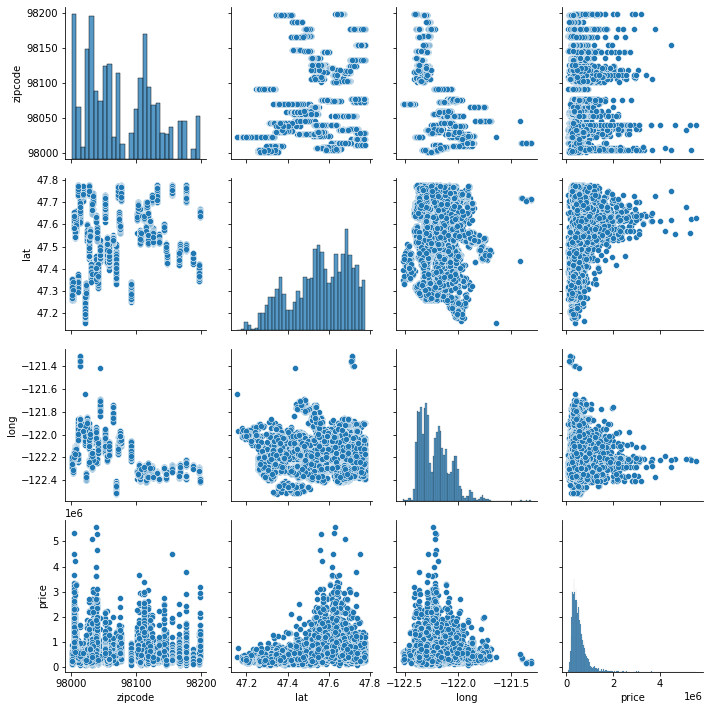

,zipcode,lat,long,price
count,14480.000000,14480.000000,14480.000000,1.448000e+04
mean,98077.653177,47.558779,-122.213708,5.410971e+05
std,53.485133,0.138751,0.141299,3.628559e+05
min,98001.000000,47.155900,-122.519000,7.500000e+04
25%,98033.000000,47.468575,-122.328000,3.210000e+05
50%,98065.000000,47.570800,-122.230000,4.500000e+05
75%,98117.000000,47.677000,-122.125000,6.450000e+05
max,98199.000000,47.777600,-121.315000,5.570000e+06


,zipcode,lat,long,price
zipcode,1.000000,0.266668,-0.559516,-0.049914
lat,0.266668,1.000000,-0.130540,0.314941
long,-0.559516,-0.130540,1.000000,0.021298
price,-0.049914,0.314941,0.021298,1.000000


In [17]:
df = pd.DataFrame(data={
    'zipcode': domy_train.loc[:, ('zipcode')],
    'lat': domy_train.loc[:, ('lat')],
    'long': domy_train.loc[:, ('long')],
    'price': ceny_train
})

# wyświetlenie histogramu nowej zmiennej
plot_dist(df, 'zipcode')
plot_dist(df, 'lat')
plot_dist(df, 'long')
plt.show()

# wyświetlenie dwuwymiarowej zależności między zmiennymi
sns.pairplot(df, kind="scatter")
plt.show()

# wyświetlenie danych statystycznych, poszczególnych zmiennych
display(df.describe())

# wyświetlenie korelacji, metoda ta domyślnie wyznacza korelacje Pearsona
display(df.corr())

Dane te określają kod pocztowy oraz kordynany sprzedanych domów, z punktu widzenia regresji liniowej są to dane jakościowe - bez odpowiedniej opróbki ciężko je w aktualnej formie wykorzystać. Chyba, że rozważamy obszar (przykładowo państswo), w którym są zauważalne różnice między wschodzem i zachodzem (przykładowo Niemcy w latach 90) lub północą i południem (przykładowo Włochy, USA)  
U nas można zauważyć małą, dodatnią korelację między ceną a szerokoscią geograficzną. Im bardziej na północ, tym ceny sprzedaży wyższe.

In [18]:
#odrzucamy zmienną
useless_features.add('zipcode')
useless_features.add('long')

## Zadanie 2
Zaproponuj 5 nowych cech będących wynikiem przeprowadzonych analiz w Zadaniu 1 lub doświadczeń.

In [19]:
extra_futures = set()

# dane reprezenetujące cechę sqft_living są prawoskośńe, 
# z tego powodu aby otrzemać nieco bardziej jednolite dane postanowiłem je zlogarytmować
# log_sqft_living = log(sqft_living)
domy_train.loc[:, ('log_sqft_living')] = domy_train.loc[:, ('sqft_living')].apply(lambda x: np.log(x))
domy_test.loc[:, ('log_sqft_living')] = domy_test.loc[:, ('sqft_living')].apply(lambda x: np.log(x))
extra_futures.add('log_sqft_living')

# 'yr_renovated' reprezentuje istotne dane określające rok renowacji
# niestety dane te są "dziurawe" - mają dużą ilość zer - w całej histori budynku nie było żadenj renowacji
# z tego powodu proponuję je wypełnić rokiem ostatniej renowacji - w przypadku zer rokiem wybudowania budynku 'yr_built'
# yr_renovated_filled = yr_renovated if df != 0 else yr_built
domy_train.loc[:, ('yr_renovated_filled')] = domy_train.loc[:, ('yr_renovated')].where(domy_train.loc[:, ('yr_renovated')]!=0, domy_train.loc[:, ('yr_built')])
domy_test.loc[:, ('yr_renovated_filled')] = domy_test.loc[:, ('yr_renovated')].where(domy_train.loc[:, ('yr_renovated')]!=0, domy_test.loc[:, ('yr_built')])
extra_futures.add('yr_renovated_filled')

# Cechy 'sqft_living', 'bathrooms' mają dużą korelację z ceną sprzedaży,
# jestem ciekawy jakie da rezultaty ich połączenie.
# sqft_living_bathrooms = sqft_living * bathrooms
domy_train.loc[:, ('sqft_living_bathrooms')] = domy_train.loc[:, ('sqft_living')] * domy_train.loc[:, ('bathrooms')]
domy_test.loc[:, ('sqft_living_bathrooms')] = domy_test.loc[:, ('sqft_living')] * domy_test.loc[:, ('bathrooms')]
extra_futures.add('sqft_living_bathrooms')

# Stare budownictwo polegało na budowanie prosotopadłościenych, wysokich domów
# aktualnie mamy tred budowania domów bardziej długich i szerokich niż wysokich
# z tego podowu propanuję dwie cechy
# sqft_average_floor = sqft_above / floors
domy_train.loc[:, ('sqft_average_floor')] = domy_train.loc[:, ('sqft_above')] / domy_train.loc[:, ('floors')]
domy_test.loc[:, ('sqft_average_floor')] = domy_test.loc[:, ('sqft_above')] / domy_test.loc[:, ('floors')]
extra_futures.add('sqft_average_floor')

# Generalnie domy które są jednocześnie duże oraz w dobrym stanie są drogie w utrzymainu,
# dlatego podczas dobrej koniunktury nie należą do tańszych
# z tego powodu sugeruję pomołączenie cech 'sqft_living' wraz z 'grade'
# sqft_living_grade = sqft_lot * view
domy_train.loc[:, ('sqft_living_grade')] = domy_train.loc[:, ('sqft_living')] * domy_train.loc[:, ('grade')]
domy_test.loc[:, ('sqft_living_grade')] = domy_test.loc[:, ('sqft_living')] * domy_test.loc[:, ('grade')]
extra_futures.add('sqft_living_grade')


c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be se

## Zadanie 3
Dokonaj wizualiazji nowych cech i okreś ich korelację oraz liniową zależność między każdą z tych zmiennych, a zmienną opisywaną. 

### 'log_sqft_living'

c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


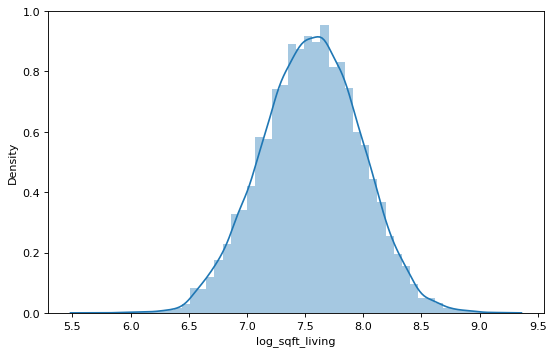

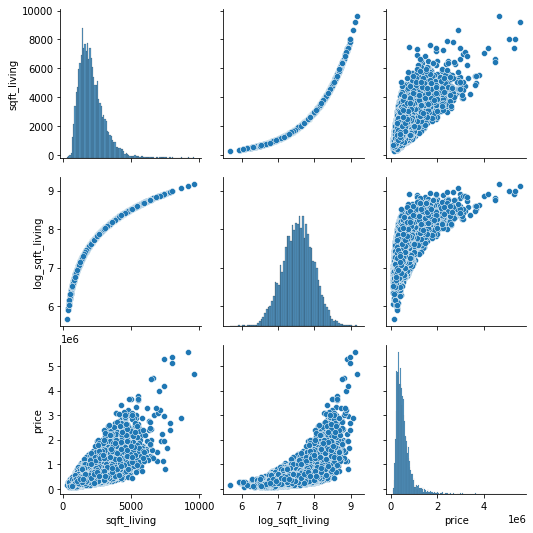

,sqft_living,log_sqft_living,price
sqft_living,1.000000,0.956408,0.708303
log_sqft_living,0.956408,1.000000,0.621453
price,0.708303,0.621453,1.000000


In [20]:
# log_sqft_living = log(sqft_living)
df = pd.DataFrame(data={
    'sqft_living': domy_train.loc[:, ('sqft_living')],
    'log_sqft_living': domy_train.loc[:, ('log_sqft_living')],
    'price': ceny_train
})

# wyświetlenie histogramu nowej zmiennej
plot_dist(df, 'log_sqft_living')
plt.show()

# wyświetlenie dwuwymiarowej zależności między zmiennymi
sns.pairplot(df, kind="scatter")
plt.show()

# wyświetlenie korelacji, metoda ta domyślnie wyznacza korelacje Pearsona
display(df.corr())

log_sqft_living = log(sqft_living)

Nowa zmienna 'log_sqft_living' jest prawie liniowo zależna od zmiennej źródłowej 'sqft_living' - współczynik korelacji Pearsona 0.96     

Gorzej sytuacja wygląda w przypadku korelacji nowego współczynika z ceną sprzedaży, ponieważ uzyskaliśmy gorszą korelację (0.62) niż w przypadku danych surowych (0.71). Jak można zauważyć, sztuczna skośności danych poprzez logarytmizowanie, niekoniecznie daje pożądany efekt. 

### 'yr_renovated_filled'

c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


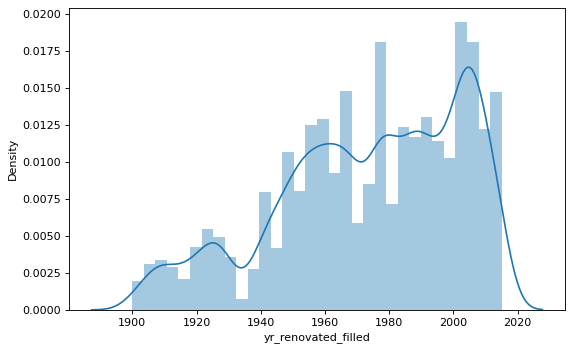

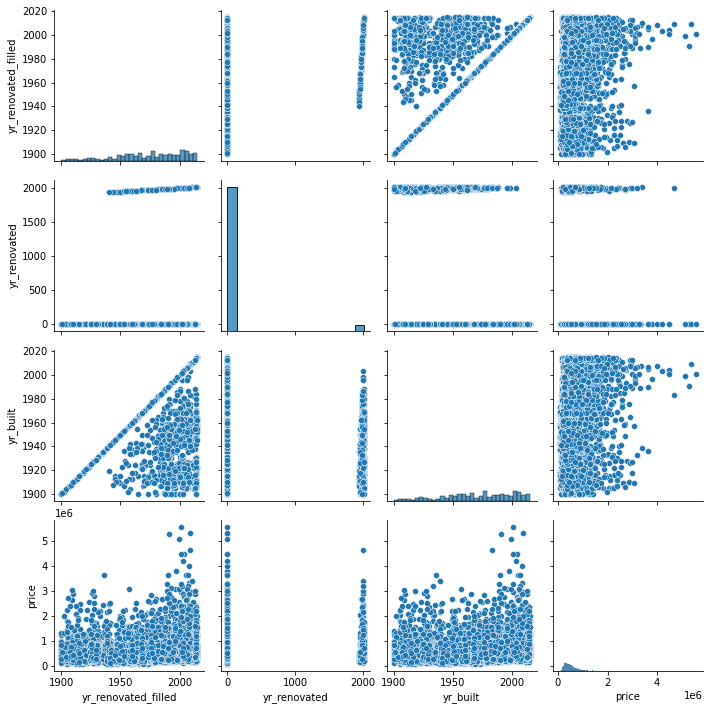

,yr_renovated_filled,yr_renovated,yr_built,price
yr_renovated_filled,1.000000,0.158605,0.910204,0.109809
yr_renovated,0.158605,1.000000,-0.229562,0.120543
yr_built,0.910204,-0.229562,1.000000,0.060083
price,0.109809,0.120543,0.060083,1.000000


In [178]:
# yr_renovated_filled = yr_renovated if df != 0 else yr_built
df = pd.DataFrame(data={
    'yr_renovated_filled': domy_train.loc[:, ('yr_renovated_filled')],
    'yr_renovated': domy_train.loc[:, ('yr_renovated')],
    'yr_built': domy_train.loc[:, ('yr_built')],
    'price': ceny_train
})

# wyświetlenie histogramu nowej zmiennej
plot_dist(df, 'yr_renovated_filled')
plt.show()

# wyświetlenie dwuwymiarowej zależności między zmiennymi
sns.pairplot(df, kind="scatter")
plt.show()

# wyświetlenie korelacji, metoda ta domyślnie wyznacza korelacje Pearsona
display(df.corr())

yr_renovated_filled = yr_renovated if df != 0 else yr_built

Nowa zmienna 'yr_renovated_filled' jest:
* prawie liniowo zależna od zmiennej źródłowej 'yr_built' - współczynik korelacji Pearsona 0.91 
* prawie nieliniowo zależna od zmiennej źródłowej 'yr_renovated' - współczniki współczynik korelacji Pearsona (0.16)

Gorzej sytuacja wygląda w przypadku korelacji nowego współczynika z ceną sprzedaży, ponieważ uzyskaliśmy gorszą korelację z (0.11) niż w przypadku danych źródłowych 'yr_renovated' (0.12)

Oznacza to nie udało się skutecznie połączyć tych danych 'yr_renovated' oraz 'yr_built'.

### 'sqft_living_bathrooms'

c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


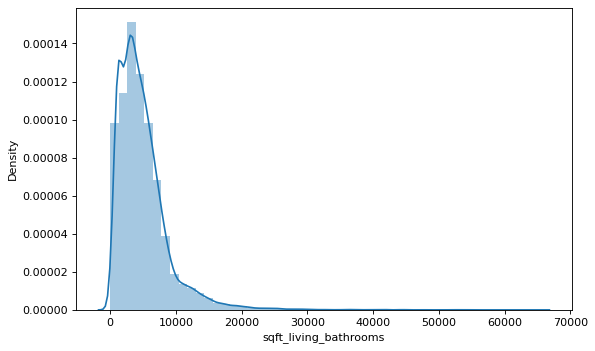

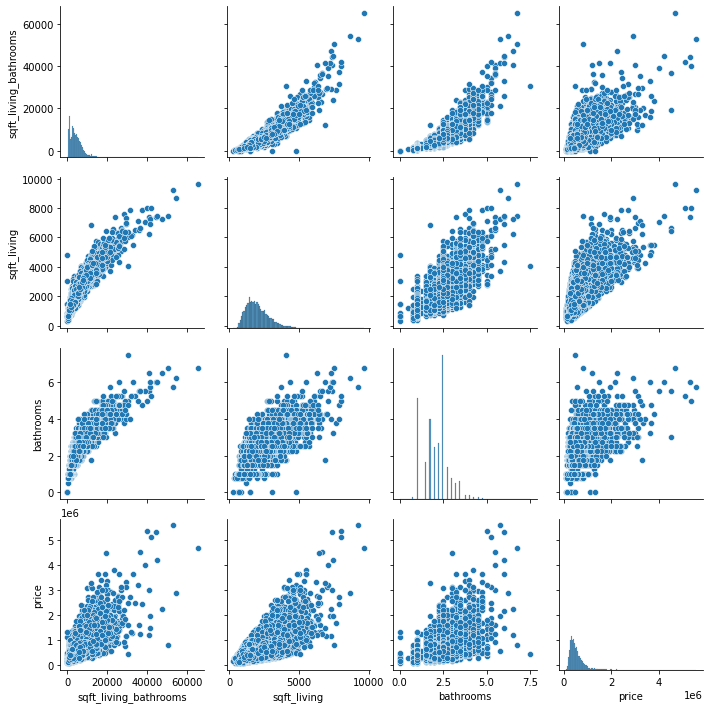

,sqft_living_bathrooms,sqft_living,bathrooms,price
sqft_living_bathrooms,1.000000,0.931281,0.860721,0.713754
sqft_living,0.931281,1.000000,0.753367,0.708303
bathrooms,0.860721,0.753367,1.000000,0.530623
price,0.713754,0.708303,0.530623,1.000000


In [179]:
# sqft_living_bathrooms = sqft_living * bathrooms

df = pd.DataFrame(data={
    'sqft_living_bathrooms': domy_train.loc[:, ('sqft_living_bathrooms')],
    'sqft_living': domy_train.loc[:, ('sqft_living')],
    'bathrooms': domy_train.loc[:, ('bathrooms')],
    'price': ceny_train
})

# wyświetlenie histogramu nowej zmiennej
plot_dist(df, 'sqft_living_bathrooms')
plt.show()

# wyświetlenie dwuwymiarowej zależności między zmiennymi
sns.pairplot(df, kind="scatter")
plt.show()

# wyświetlenie korelacji, metoda ta domyślnie wyznacza korelacje Pearsona
display(df.corr())

sqft_living_bathrooms = sqft_living * bathrooms

Nowa cecha 'sqft_living_bathrooms' jest:
* prawie liniowo zależna od zmiennej źródłowej 'sqft_living' - współczynik korelacji Pearsona 0.93
* nieco słabiej liniowo zależna od zmiennej 'bathrooms' - współczniki współczynik korelacji Pearsona 0.86

Tutaj chciałem sprawdzić czy połacznie dwóch cech które mają dobrą korelację z ceną sprzedaży, pomoże uzyskać jeszcze lepszą korelację. Uzyskałem korelację porównywalną z korelacją najlepszej cechy.

Moim wnioskiem jest, że łączenie danych bez logicznego uzasadnienia prawdopodobnie nie da sensownych rezultatów.

### 'sqft_average_floor'

c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


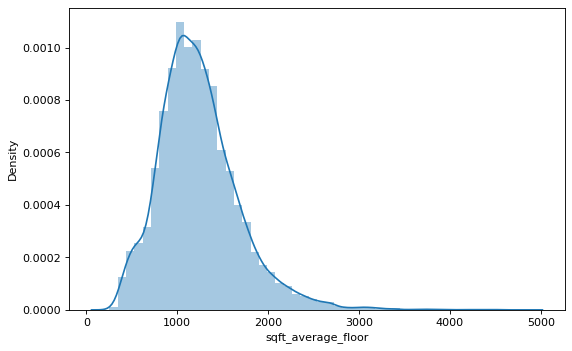

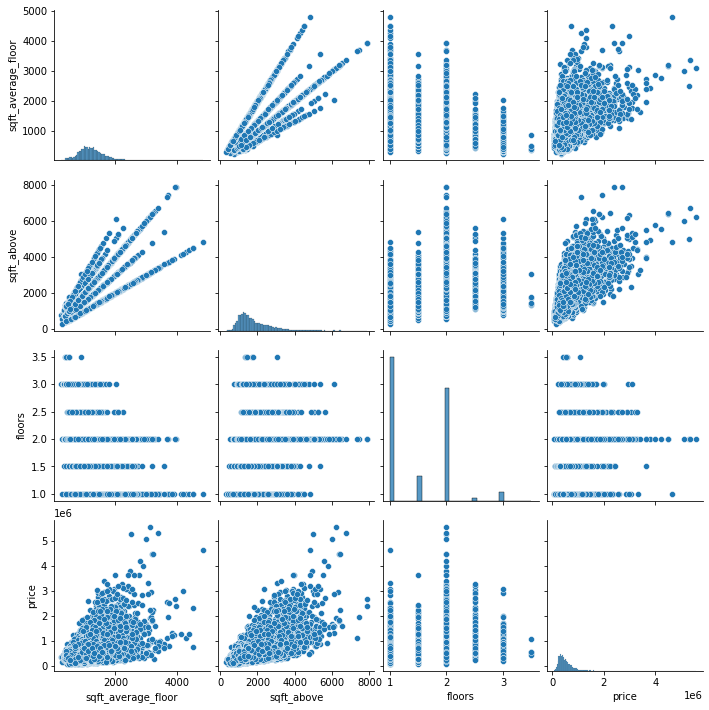

,sqft_average_floor,sqft_above,floors,price
sqft_average_floor,1.000000,0.633441,-0.249925,0.435095
sqft_above,0.633441,1.000000,0.525460,0.611394
floors,-0.249925,0.525460,1.000000,0.267527
price,0.435095,0.611394,0.267527,1.000000


In [23]:
# sqft_average_floor = sqft_above / floors
df = pd.DataFrame(data={
    'sqft_average_floor': domy_train.loc[:, ('sqft_average_floor')],
    'sqft_above': domy_train.loc[:, ('sqft_above')],
    'floors': domy_train.loc[:, ('floors')],
    'price': ceny_train
})

# wyświetlenie histogramu nowej zmiennej
plot_dist(df, 'sqft_average_floor')
plt.show()

# wyświetlenie dwuwymiarowej zależności między zmiennymi
sns.pairplot(df, kind="scatter")
plt.show()

# wyświetlenie korelacji, metoda ta domyślnie wyznacza korelacje Pearsona
display(df.corr())

sqft_average_floor = sqft_above / floors

Nowa cecha 'sqft_average_floor' jest:
* częsiowo liniowo zależna od zmiennej źródłowej 'sqft_above' - współczynik korelacji Pearsona 0.63
* słabo ujemnie liniowo zależna od zmiennej źródłowej 'floors' - współczniki współczynik korelacji Pearsona (-0.25)

Gorzej sytuacja wygląda w przypadku korelacji nowego współczynika z ceną sprzedaży, ponieważ uzyskaliśmy gorszą korelację (0.43) niż w przypadku jednej danej zmiennej zródłowej 'sqft_above' (korelacja: 0.61). Zatem rozmiar metrażu domu ma większy wpływ na cenę nieruchomości, niż średni metraż każdego z piętra (generalnie szerokość i długość domu)

### 'sqft_living_grade'

c:\users\jose\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


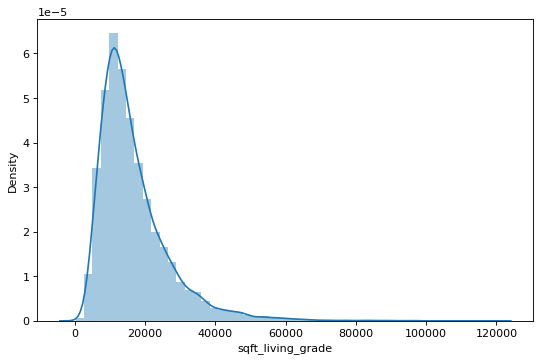

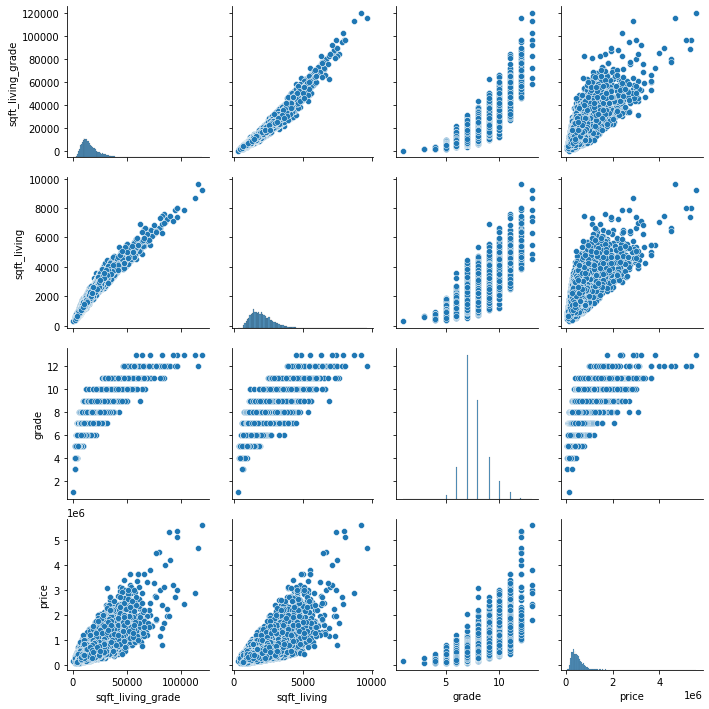

,sqft_living_grade,sqft_living,grade,price
sqft_living_grade,1.000000,0.973569,0.852860,0.761461
sqft_living,0.973569,1.000000,0.766470,0.708303
grade,0.852860,0.766470,1.000000,0.675449
price,0.761461,0.708303,0.675449,1.000000


In [24]:
# sqft_living_grade = sqft_lot * view
df = pd.DataFrame(data={
    'sqft_living_grade': domy_train.loc[:, ('sqft_living_grade')],
    'sqft_living': domy_train.loc[:, ('sqft_living')],
    'grade': domy_train.loc[:, ('grade')],
    'price': ceny_train
})

# wyświetlenie histogramu nowej zmiennej
plot_dist(df, 'sqft_living_grade')
plt.show()

# wyświetlenie dwuwymiarowej zależności między zmiennymi
sns.pairplot(df, kind="scatter")
plt.show()

# wyświetlenie korelacji, metoda ta domyślnie wyznacza korelacje Pearsona
display(df.corr())

sqft_living_grade = sqft_lot * view

Nowa zmienna 'sqft_living_grade' jest:
* niemaliże liniowo zależna od zmiennej źródłowej 'sqft_living' - współczynik korelacji Pearsona 0.97
* mocono liniowo zależna od zmiennej źródłowej 'grade' - współczniki korelacji Pearsona 0.85

Nowa cecha względem ceny sprzedaży ma lepszy współczniki korelacji (0.76) niż 'sqft_living' (0.71) oraz 'grade' (0.67). Oznacza to że przuszczenie:
> Generalnie domy które są jednocześnie duże oraz w dobrym stanie są drogie w utrzymainu,
> dlatego podczas dobrej koniunktury nie należą do tańszych
> z tego powodu sugeruję pomołączenie cech 'sqft_living' wraz z 'grade'
> sqft_living_grade = sqft_lot * view

może być trafnym przypszczeniem

## Zadanie 4
Napisz metodę regresji krokowej w tył i za jej pomocą wybierz 5 najbardziej wartościowych cech.

In [93]:
def regresion(X, y):
    pinw = np.linalg.pinv(X)
    return np.dot(pinw, y)

In [33]:
# utworzenie listy cech początkowych
features = cechy.copy()

# usunięcie cech nieistotnych
for feature in useless_features:
    idx = np.where(features == feature)
    features = np.delete(features,idx)
    
features_extra = features.copy()

# dodanie zaproponowanych cech
for feature in extra_futures:
    features_extra = np.append(features_extra, feature)

display(features_extra)

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'yr_renovated_filled', 'log_sqft_living', 'sqft_living_grade',
       'sqft_living_bathrooms', 'sqft_average_floor'], dtype=object)

In [88]:
# UWAGA: nie wiem czemu zawsze nie działa przy pierwszym uruchomieniu tej komórki, wyrzuca błąd 'SVD did not converge'

back_stepwise_features = features_extra

# pętla wykonana tyle razy aby zostało 5 cech
for _ in range(back_stepwise_features.shape[0] - 5):
    wrost_feature_sse = 0
    wrost_feature_index = 0;
    
    # szukamy najgorszej cechy
    for idx, future in enumerate(back_stepwise_features):
        # generujemy zbiór testowy
        test_features = back_stepwise_features.copy()
        test_features = np.delete(test_features,idx)
        
        # wyznaczamy współczyniki
        w = regresion(domy_train[test_features],ceny_train)
        # Wylicz przewidywaną wartość
        y = np.dot(domy_test[test_features],w)
        # Policz błąd bezwzglęny
        e = np.absolute(y - ceny_test)
        # Podnieś błędy do kwadratu i zsumuj je
        SSE = np.dot(e,e.T)
        
        # jeżeli jest to największy dotychczas zaobserwowany błąd,
        # to zapamiętujemy ideks tego współczynika (jest to najmniej istotny współczynik)
        if SSE >= wrost_feature_sse:
            wrost_feature_index = idx
            wrost_feature_sse = SSE
    
    # usuwamy namniej istotny współczynik z puli współczyników
    display(f"Deleated {back_stepwise_features[wrost_feature_index]} SSE: {wrost_feature_sse}")
    back_stepwise_features = np.delete(back_stepwise_features, wrost_feature_index)

    
display(f"Final features: {back_stepwise_features}")

final_features_back_stepwise = back_stepwise_features

'Deleated lat SSE: 325452863620841.7'

'Deleated sqft_living_grade SSE: 351523490545953.56'

'Deleated grade SSE: 410988265148103.7'

'Deleated sqft_living_bathrooms SSE: 436141363446345.6'

'Deleated waterfront SSE: 453309368346091.7'

'Deleated view SSE: 488941785119665.2'

'Deleated condition SSE: 502646438754103.8'

'Deleated bedrooms SSE: 511794006835623.2'

'Deleated yr_renovated SSE: 519517799280204.44'

'Deleated log_sqft_living SSE: 525615127102554.2'

'Deleated sqft_lot SSE: 526900949130976.0'

'Deleated floors SSE: 527775582945717.7'

'Deleated yr_built SSE: 527784180134702.06'

'Deleated yr_renovated_filled SSE: 528467907367800.25'

"Final features: ['bathrooms' 'sqft_living' 'sqft_above' 'sqft_basement'\n 'sqft_average_floor']"

Mała uwaga:  
Można zauważyć, ża każderazowe usunięcie cechy, niezależnie jaką ona ma korelację z ceną sprzedaży, powoduje zwiększenie SSE.

## Zadanie 5
Dokonaj normalizacji cech (wszystkie podane + 5 zaproponowanych w Zadaniu 1) i przy pomocy metody Lasso lub LARS wybierz 5 najbardziej wartościowych cech.

!!! Przy przekształceniach unikaj korzystania z informacji zawartej w zbiorze walidacyjnym i testowym !!!

In [72]:
def coordinate_descent_l1_penalty(X, y, w, lambda_ = 0.01, num_iters=100):
    m,n = X.shape
    
    # wykonujemy określoną ilość iteracji
    for _ in range(num_iters): 
        # obliczamy dla każdej kolumny odzielnie
        for j in range(n):
            # wyciany interesującą nas kolumnę
            X_j = X[:,j].reshape(-1,1)
            # wyznaczamy wartość estymowaną dla wcześniejszych współczyników
            y_pred = np.dot(X, w)
            # wyznaczamy rho
            rho = np.dot(X_j.T, (y - y_pred  + w[j]*X_j))
                
            # wykorzystujemy pewien threshold,
            # służy on abyśmy sprytnie omineli niewygodny dla nas punkt 0 gdzie nie ma pochodnej
            if rho < - lambda_:
                w[j] = rho + lambda_
            elif rho >  lambda_:
                w[j] = rho - lambda_
            else: 
                w[j] = 0
            
    return w.flatten()

'Końcowe lambda: 5368709.12'

'Współczyniki:'

array([       0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,  1070036.46342556,
        3729713.04207206,  6405140.47464145,  4002530.23983317,
              0.        ,        0.        ,        0.        ,
              0.        ,        0.        ,        0.        ,
              0.        , 56951367.50260408,        0.        ,
              0.        ])

"Cechy które pozosały: ['waterfront' 'view' 'condition' 'grade' 'sqft_living_grade']"

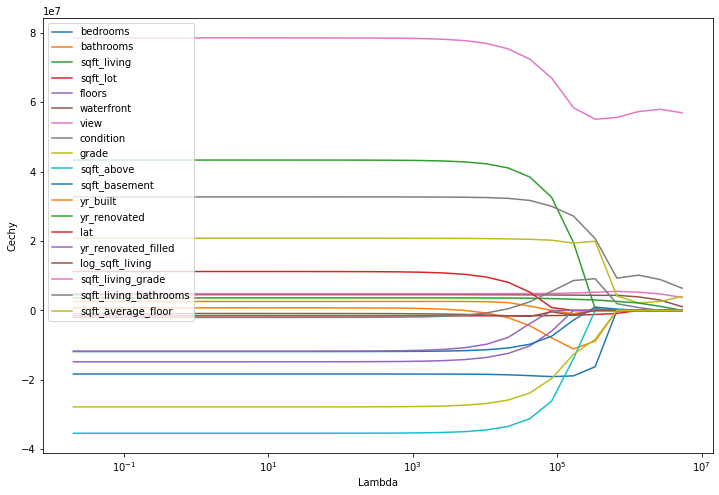

In [148]:
# tworzym X oraz y
# przekształcam do numpy array, ponieważ dla typu DataFrame liczyło bardzo długo każdą z iteracji
features_lasso = features_extra
X = domy_train[features_lasso].to_numpy()
y = ceny_train.to_numpy().reshape(-1,1)

# normalizacja X
X = X / (np.linalg.norm(X,axis = 0))

lambda_list = list()
w_list = list()

# dodajemy licznik, który jest odpowiedzialny za zwiększanie kary
lambda_counter = 1
while True:
    # w każdej iteracji kara jest coraz większa
    lambda_ = 0.01*2**lambda_counter
    
    # wyznaczamy współczynniki
    w = np.zeros((features_lasso.shape[0],1))
    w = coordinate_descent_l1_penalty(X, y, w, lambda_ = lambda_, num_iters=100)
    
    lambda_list.append(lambda_)
    w_list.append(w)
    
    # jeśli zostało mniej niż 6 nieujemnych współczyników, przerwamy pętlę
    if w.nonzero()[0].shape[0] < 6:
        break

    lambda_counter = lambda_counter + 1

# wykreślenie wykresu
plt.figure(figsize = (12,8))

lambda_array = np.array(lambda_list)
w_matrix = np.array(w_list)

for i in range(features_lasso.shape[0]):
    plt.plot(lambda_array, w_matrix[:,i], label = features_lasso[i])

plt.xlabel('Lambda')
plt.ylabel('Cechy')
plt.xscale('log')
plt.legend()

# drukowanie końcowe
final_features_lasso = features_lasso[w.nonzero()[0]]
final_w_lasso = regresion(domy_train[final_features_lasso], ceny_train)

display(f"Końcowe lambda: {lambda_}")
display("Współczyniki:", w)
display(f"Cechy które pozosały: {final_features_lasso}")

## Zadanie 6
Dla 5 wybranych w Zadaniu 5 cech dokonaj doboru współczynnika regularyzacji dla metody grzbietowej. 

In [76]:
def cross_validation_get_data(X, y, i,num_k_fold):
    n = X.shape[0]    
    start = int((n*i)/num_k_fold)
    end = int((n*(i+1))/num_k_fold-1)
    X_cv_val = X[start:end]
    y_cv_val = y[start:end]
    X_cv_test = np.concatenate((X[0:start], X[end+1:n]))
    y_cv_test = np.concatenate((y[0:start], y[end+1:n]))
    return X_cv_val, y_cv_val, X_cv_test, y_cv_test

def regresion_l2_penalty(X, y, lambda_, interception=False):
    identity = np.eye(X.shape[1])
    if interception:
        identity[0] = 0
    left_side = np.linalg.inv( np.dot(X.T, X) + lambda_*identity )
    tmp = np.dot(left_side,X.T)
    return np.dot(tmp, y)

def get_sse(X, y, w):
    # Wylicz przewidywaną wartość
    y_pred = np.dot(X, w)
    # Policz błąd bezwzglęny
    error = np.absolute(y_pred - y)
    # Podnieś błędy do kwadratu i zsumuj je
    sse = np.dot(error,error.T)
    return sse    

'Lambda dla której mamy najmniejszy średni błąd uczenia: 0.1, SSE: 383367884797637.1'

'Najlepsze współczynniki: [ 4.67973047e+05  6.14611445e+04  3.07249024e+04 -3.31067583e+02\n  2.51795307e+01]'

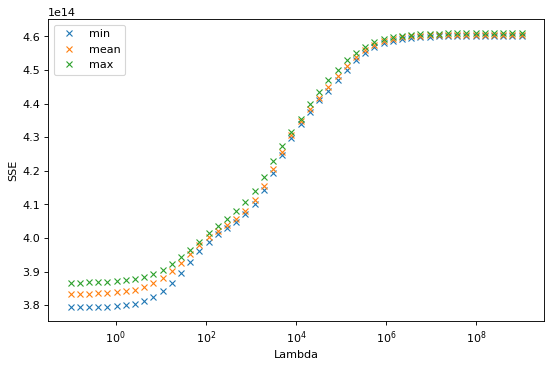

In [86]:
# przygotowanie danych
ridge_regresion_features = final_features_lasso
X_learn = domy_train[ridge_regresion_features].to_numpy()
y_learn = ceny_train.to_numpy()
X_test = domy_test[ridge_regresion_features].to_numpy()
y_test = ceny_test.to_numpy()


# liczba iteracj walidacji krzyżowej
num_k_fold = 4

# generowanie tablicy testowanych współczyników regularyzacji
iter_num = 50
lambda_ = np.logspace(0,10,iter_num)/10

sse_df = pd.DataFrame(data={
    'lambda_': lambda_,
    'sse_min': np.zeros(iter_num),
    'sse_avg': np.zeros(iter_num),
    'sse_max': np.zeros(iter_num),
})

for idx, l in enumerate(lambda_):
    # do walidacji krzyżowej wykorzystujemy pewne zakresy danych
    # z tego względu, że dane są już pomieszane,
    # zakresy te mogą być pewnymi odcinkami danych
    sse_tmp = np.zeros(num_k_fold)
    for i in range (num_k_fold):
        X_cv_val, y_cv_val, X_cv_test, y_cv_test = cross_validation_get_data(X_learn, y_learn, i, num_k_fold=num_k_fold)
        w = regresion_l2_penalty(X_cv_val, y_cv_val, lambda_=l)
        sse_tmp[i] = get_sse(X_test, y_test, w)
        
    sse_df.at[idx, 'sse_min'] = min(sse_tmp)
    sse_df.at[idx, 'sse_avg'] = np.mean(sse_tmp)
    sse_df.at[idx, 'sse_max'] = max(sse_tmp)
    
    
plt.figure(figsize=(8,5), dpi= 80)
plt.plot(sse_df.lambda_, sse_df.sse_min, 'x', label='min')
plt.plot(sse_df.lambda_, sse_df.sse_avg, 'x', label='mean')
plt.plot(sse_df.lambda_, sse_df.sse_max, 'x', label='max')
plt.xscale('log')
plt.legend()
plt.xlabel("Lambda")
plt.ylabel("SSE")
plt.plot()

best_lambda = np.where(sse_df == min(sse_df.sse_avg))[0][0]
# uczymy na całym zbiorze uczącym
w_best = regresion_l2_penalty(X_learn, y_learn, best_lambda)

display(f"Lambda dla której mamy najmniejszy średni błąd uczenia: {lambda_[best_lambda]}, SSE: {sse_df.sse_avg[best_lambda]}")
display(f"Najlepsze współczynniki: {w_best}")

final_features_ridge_regresion = ridge_regresion_features
final_w_ridge_regresion = w_best

## Zadanie 7
Wytrenuj 5 modeli:
1. Wykorzystujący wszystkie cechy dane w zbiorze.
2. Wykorzystujący wszystkie cechy dane w zbiorze + 5 zaproponowanych.
3. Wykorzystujący 5 cech wybranych regresją krokową w tył.
4. Wykorzystujące tylko cechy wybrane dzięki metodzie Lasso.
5. Wykorzystujące cechy wybrane w metodzie Lasso i poddane regularyzacji grzbietowej dla wybranego współczynnika regularyzacji.

Porównaj średni błąd uczenia i testowania dla tych 5 modeli. Oceń, który model jest najlepszy.

'All'

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat'], dtype=object)

'All + 5 extra'

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       'yr_renovated_filled', 'log_sqft_living', 'sqft_living_grade',
       'sqft_living_bathrooms', 'sqft_average_floor'], dtype=object)

'Top 5 back stepwise'

array(['bathrooms', 'sqft_living', 'sqft_above', 'sqft_basement',
       'sqft_average_floor'], dtype=object)

'Top 5 L1'

array(['waterfront', 'view', 'condition', 'grade', 'sqft_living_grade'],
      dtype=object)

'Top 5 L1 + L2'

array(['waterfront', 'view', 'condition', 'grade', 'sqft_living_grade'],
      dtype=object)

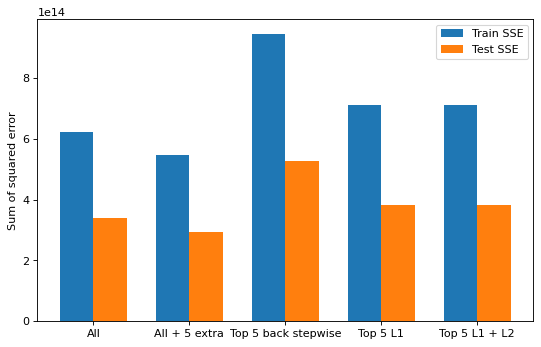

In [186]:
data_list = [
    {
        "comment": "All",
        "features": features,
        "w": regresion(domy_train[features], ceny_train)
    },
    {
        "comment": "All + 5 extra",
        "features": features_extra,
        "w": regresion(domy_train[features_extra], ceny_train)
    },
    {
        "comment": "Top 5 back stepwise",
        "features": final_features_back_stepwise,
        "w": regresion(domy_train[final_features_back_stepwise], ceny_train)
    },
    {
        "comment": "Top 5 L1",
        "features": final_features_lasso,
        "w": final_w_lasso
    },
    {
        "comment": "Top 5 L1 + L2",
        "features": final_features_ridge_regresion,
        "w": final_w_ridge_regresion
    },
] 

labels = list()
train_sse = list()
test_sse = list()

for data in data_list:
    display(data['comment'] , data['features'])
    
    labels.append(data['comment'])
    train_sse.append(get_sse(domy_train[data['features']], ceny_train, data['w']))
    test_sse.append(get_sse(domy_test[data['features']], ceny_test, data['w']))

    
# rysowanie wykresu    
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5), dpi= 80)
rects1 = ax.bar(x - width/2, train_sse, width, label='Train SSE')
rects2 = ax.bar(x + width/2, test_sse, width, label='Test SSE')

ax.set_ylabel('Sum of squared error')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.set_xticks(x)

Wnioski:
* generalnie im więcej cech tym mniejszy błąd uczenia oraz testowania. Z tego względu najmniejszy błąd uzyskamilśmy dla wszysykich cech jakie mieliśmy "pod ręką" - dla kolumny 'All + 5 extra', która zawiera 19 cech. Drugi najmniejszy błąd uzyskamliśmy dla kolumny 'All' która zaiera 14 cech. Pozostałe kolumny, które zawierają większy błąd predykcji zawierają po 5 cech.
* aby uzyskać dobre możliwości predykcyjne modelu z wykorzystaniem pewnej skończonej ilości cech istotne jest aby cechy te:
   1. były możliwie liniowo zależne z estymowaną wartością
   2. były wzajemnie niezależne (niosąca się informacja się nie powtarzała)  
* Porównywane metod
   * metoda **regresji krokowej** dopiera cechy minimalizując sumeryczny wpływ cech na błąd predykcji - szuka cechy które są możliwie liniowo zależne z estymowaną wartością
   * metoda **lasso** dobiera cechy minimalizując równocześnie resztkową sumę kwadratów (ang. residual sum of squares) oraz współczynniki poszczególnych cech. Generalnie gdy posiadamy cechy liniowo zależne, w skutek uczenia modelu uzyskujemy duże wartości współczyników (duża warianjcę), ponieważ ze względu na swoją współzależność, współczyniki te "zwalczaj się wzajemnie". Dlatego metoda lasso podczas elmitacji uwzględnia czy współczyniki te są liniowo zależne i jeżeli to się opłaca to je elminuje.
   
   Z tego powodu metoda Lasso lepiej poradziła sobie niż metoda regresji krokowej, ponieważ jej współczyniki dodatkowo są możliwie liniowo niezależne - niosą więcej informacji przydatych podczas predykcji.  
   Poniższe tabele to potwierdzają - cechy dobrane przez metody regresji krokowej są bardziej wzajemnie zależne.

In [184]:
display("regresja krokowa", domy_train[final_features_back_stepwise].corr())
display("lasso", domy_train[final_features_lasso].corr())

'regresja krokowa'

,bathrooms,sqft_living,sqft_above,sqft_basement,sqft_average_floor
bathrooms,1.000000,0.753367,0.684442,0.276581,0.358783
sqft_living,0.753367,1.000000,0.877504,0.425632,0.656188
sqft_above,0.684442,0.877504,1.000000,-0.060467,0.633441
sqft_basement,0.276581,0.425632,-0.060467,1.000000,0.170546
sqft_average_floor,0.358783,0.656188,0.633441,0.170546,1.000000


'lasso'

,waterfront,view,condition,grade,sqft_living_grade
waterfront,1.000000,0.408402,0.023812,0.073745,0.105352
view,0.408402,1.000000,0.041186,0.248875,0.294415
condition,0.023812,0.041186,1.000000,-0.147080,-0.087640
grade,0.073745,0.248875,-0.147080,1.000000,0.852860
sqft_living_grade,0.105352,0.294415,-0.087640,0.852860,1.000000


* czymu regresja grzbietowa nic nie wniosła w proces uczenia modelu? Regularyzacja L2 powoduje ograniczenie wariancji. W mojej ocenie, mogę się mylić, model nie posiadał wariancji, którą można było by ograniczyć. Ewentualnei jest to związane z komrpomisen między obciążeniem a wariancją - mamy bardzo uproszczony model.

Porównując błedy uczenia z błędami testowania, żaden z naszych modeli nie jest przeuczony. Z tego powodu w mojej ocenie najlepszy jest model, który posiada najmniejszy błąd testowania - posiadający największą ilosć cech. Jeżeli bylibyśmy ograniczni pod względem zasobów pamięciowych itp. To wybierałbym odpowiednio kolejne modele z mniejszą iloscią cech ale nadal możliwie najmniejszym błędem testowania.